In [41]:
%reload_ext autoreload
%autoreload 2
from graphe import *

## Création du graphe

In [42]:
graph = graphe("exemples/ex.mdp")

Attributs : 
- self.actions
- self.states
- self.transact
- self.transnoact
- self.dictStates (mapping des états vers un numéro)
- self.dictActions (mapping des actions vers un numéro)

Méthodes :
- self.grapheToMat()
- self.verifGraphe()
- self.visualizeGraphe()
- self.parcours()
- self.statistiques()

In [4]:
graph.transact

[['S1', 'b', ['S1', 'S0'], [2, 8]],
 ['S1', 'a', ['S2', 'S0', 'S1'], [1, 3, 6]],
 ['S2', 'c', ['S0', 'S1'], [5, 5]]]

In [5]:
graph.states

['S0', 'S1', 'S2']

- grapheToMat() transforme le graphe en une matrice d'adjacence avec poids $S*S*A$ où S est le nombre d'état et A le nombre d'actions. 

In [6]:
graph.grapheToMat()

array([[[0., 5., 5.],
        [3., 6., 1.],
        [0., 0., 0.]],

       [[0., 5., 5.],
        [8., 2., 0.],
        [0., 0., 0.]],

       [[0., 5., 5.],
        [0., 0., 0.],
        [5., 5., 0.]]])

In [7]:
help(graph._verifGraphe)

Help on method _verifGraphe in module graphe:

_verifGraphe() -> str method of graphe.graphe instance
    Fonction appelée lors de l'initialisation. Vérifie que le graphe est correct : 
        - Vérifie que les états et actions utilisés dans les transitions sont bien définis.
        - Vérifie que s'il existe une transition avec action de x vers y, alors il n'existe pas de transition sans action de x vers y.
        - Vérifie que les poids se somment à un



In [8]:
graph._verifGraphe() # Renvoie vide car la chaîne est correcte

''

- vérifGraphe est appelée dès la création d'un graphe. Les erreurs associées s'affichent.

In [17]:
graphe("exemples/ex2.mdp") # vérifGraphe est appelée dès la création d'un graphe. Les erreurs associées s'affichent

line 7:0 extraneous input 'S2' expecting {';', '+'}


AssertionError: S1 état non défini
c action non définie
La transition de S1 vers S1 existe avec ET sans action.
La transition de S1 vers S2 existe avec ET sans action.
Les poids des transitions à partir de S1 avec l'action b ne se somment pas à 1

- visualizeGraphe() représente la chaîne de Markov. 

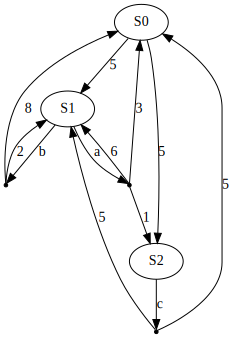

In [10]:
graph.visualizeGraphe()

- visualizeGrapheState() représente la chaîne de Markov en mettant en évidence un noeud et les transitions possibles à partir de celui-ci

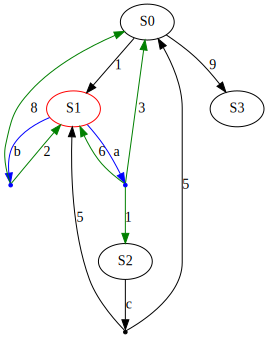

In [38]:
graph._visualizeGrapheState("S1")

- visualizeGrapheTransition représente la chaîne de Markov et la transition empruntée

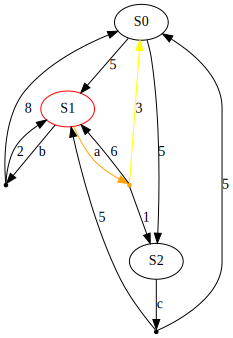

In [12]:
graph._visualizeGrapheTransition("S1","S0","a")

- parcours() réalise le parcours d'un graphe en prenant en compte différentes règles d'affichage / calcul

In [13]:
help(graph.parcours)

Help on method parcours in module graphe:

parcours(N_pas=50, regle='', ret_chemin=False, print_txt=False, print_step=0, make_gif=False) -> list method of graphe.graphe instance
    Parcours du graphe selon une règle choisie par l'utilisateur. 
    regle : Choix de la méthode de parcours 
        - "alea" : Choix aléatoire des actions et des états. 
                print_txt : Affiche du texte à chaque itération si True
                print_step : Pour une exécution en notebook, le graphe sera affiché tous les print_step
        - "notebook" : L'utilisateur choisit les actions, les états sont aléatoires. Le graphe est affiché à chaque étape. 
        - autre : Parcours du graphe en demandant à l'utilisateur les actions, et en choisissant aléatoirement les états.
    N_pas : Nombre de pas à effectuer dans le graphe
    make_gif : Si True, un fichier parcours.gif sera créé
    ret_chemin : Si True, la fonction renvoie les noeuds parcourus.



Règle aléatoire : les transitions et les états sont choisis aléatoirement.

In [43]:
graph.parcours(N_pas = 60, regle="alea", make_gif = True)

MoviePy - Building file parcours.gif with imageio.


Règle notebook : L'utilisateur choisit les actions, et les états atteints sont aléatoirement choisis.

In [ ]:
graph.parcours(N_pas = 5, regle = "notebook", ret_chemin = True)

L'action a est choisie, l'état S1 est atteint avec une probabilité p = 0.6


[0, 2, 1, 1]

- statistiques() construit un tableau représentant les propriétés de passage et d'arrivée dans un état.

In [15]:
help(graph.statistiques)

Help on method statistiques in module graphe:

statistiques(N_pas=50, N_parcours=50) method of graphe.graphe instance
    Étude statistique de graphe par parcours aléatoires
    N_pas : Nombre de pas à effectuer dans le graphe
    N_parcours : Nombre de parcours



In [16]:
d = graph.statistiques(N_parcours=40, N_pas = 100)

Freq      ->S0     ->S1     ->S2    Total
S0     0.00000  0.17925  0.17800  0.35725
S1     0.25375  0.16325  0.02525  0.44225
S2     0.09625  0.10425  0.00000  0.20050
Total  0.35000  0.44675  0.20325  1.00000
